# Using the K-NN algorithm for classification of iris

In this assigment, you will classify if an Iris is 'Iris Setosa' or 'Iris Versicolour' or 'Iris Virginica' using the k nearest neighbor algorithm.

The training data is from the UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/iris.  Please download the dataset before running the code below. 

## Step 1:  Getting, understanding, and cleaning the dataset


###  Importing the dataset


In [1]:
# Import the usual libraries
import matplotlib.pyplot as plt # plotting utilities 
%matplotlib inline
import numpy as np 
import pandas as pd  # To read in the dataset we will use the Panda's library
df = pd.read_csv('iris.csv', header=None, names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width", "label"])

# Next we observe the first 5 rows of the data to ensure everything was read correctly
df.head()

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


### Data preprocesssing
It would be more convenient if the labels were integers instead of 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'.  This way our code can always work with numerical values instead of strings.

In [2]:
df['label'] = df.label.map({'Iris-setosa': 0,
              'Iris-versicolor': 1,
              'Iris-virginica': 2})
df.head()# Again, lets observe the first 5 rows to make sure everything worked before we continue

,sepal length[cm],sepal width[cm],petal length[cm],petal width,label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [3]:
# This time we will use sklearn's method for seperating the data
from sklearn.model_selection import train_test_split
names = ["sepal length[cm]","petal width"]
#After completing the assignment, try your code with all the features
#names = ["sepal length[cm]","sepal width[cm]","petal length[cm]", "petal width"]
df_X_train, df_X_test, df_y_train, df_y_test = train_test_split(df[names],df['label'], random_state=0)

X_train=df_X_train.to_numpy()
X_test=df_X_test.to_numpy()
y_train=df_y_train.to_numpy()
y_test=df_y_test.to_numpy()

#Looking at the train/test split
print("The number of training examples: ", X_train.shape[0])
print("The number of test exampels: ", X_test.shape[0])

print("The first four training labels")
print(y_train[0:4])

print("The first four iris' measurements")
print(X_test[0:4])

The number of training examples:  112
The number of test exampels:  38
The first four training labels
[1 1 2 0]
The first four iris' measurements
[[5.8 2.4]
 [6.  1. ]
 [5.5 0.2]
 [7.3 1.8]]


## visualizing the data set

Using a scatter plot to visualize the dataset

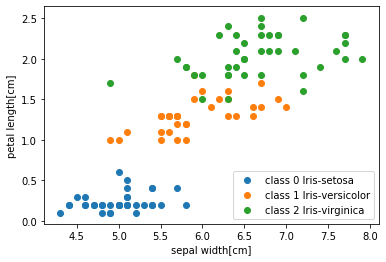

In [4]:
iris_names=['Iris-setosa','Iris-versicolor','Iris-virginica']
for i in range(0,3):
    plt.scatter(X_train[y_train == i, 0],
                X_train[y_train == i, 1],
            marker='o',
            label='class '+ str(i)+ ' '+ iris_names[i])

plt.xlabel('sepal width[cm]')
plt.ylabel('petal length[cm]')
plt.legend(loc='lower right')

plt.show()

# Your code goes here

In [5]:
def euclidean_distance(x1, x2):
  #### TO-DO #####
    
    distance=np.empty(shape=[0, 2])
    for i in range(np.size(y_train)):
        a= (x1-X_train[i][0])
        b= (x2-X_train[i][1])
        c= np.sqrt(np.power(a,2)+ np.power(b,2))
        distance=np.append(distance,np.array([[c,y_train[i]]]),axis=0)
                
    return  distance
  ##############

In [6]:
def manhattan_distance(x1,x2):
    manhattan=np.empty(shape=[0, 2])
    for i in range(np.size(y_train)):
        a= abs(x1-X_train[i][0])
        b= abs(x2-X_train[i][1])
        manhattan=np.append(manhattan,np.array([[a+b,y_train[i]]]),axis=0)
    
    return manhattan

In [7]:
def get_neighbors( X, y, x_test, k, distance= euclidean_distance):
  #### TO-DO #####    

##returning the label of the closest neighbor

    distance_array=np.empty(shape=[0, 2])
    sorted_array=np.empty(shape=[0, 2])
    neighbors=np.empty(shape=[0, 1])
    for i in range(np.size(y_test)):
        distance_array = distance(x_test[i][0],x_test[i][1])
        ##sorting the distance array in ascending order 
        sorted_array=distance_array[distance_array[:,0].argsort()]
        if(k==1):
            neighbors=np.append(neighbors,sorted_array[0,1])
        elif(k>1):
            f1=0
            f2=0
            f3=0
            for j in range(k):
                if(sorted_array[j][1]==0):
                    f1+=1
                elif(sorted_array[j][1]==1):
                    f2+=1
                else:
                    f3+=1;
            if (f1> f2) & (f1>f3):
                neighbors=np.append(neighbors,0)
            elif (f2>f1) & (f2>f3):
                neighbors=np.append(neighbors,1)
            else:
                neighbors=np.append(neighbors,2)
    
  ##############
    return neighbors

In [8]:
  #### TO-DO ##### 
#function to calculate accuracy
def accuracy(actual_y,predicted_y):
    correct_prediction=0
    for i in range(np.size(actual_y)):
        if(actual_y[i]==predicted_y[i]):
            correct_prediction+=1
    total_prediction=np.size(actual_y)
    print("correct prediction:",correct_prediction)
    accuracy=(correct_prediction/total_prediction)*100
    return accuracy

In [9]:
def zero_R_classfier(x_train,x_test,y_train,y_test):
    class1=0
    class2=0
    class3=0
    zero_r_array=np.empty(shape=[0, 1])
    for i in range(np.size(y_train)):
        if(y_train[i]==0):
            class1+=1
        elif (y_train[i]==1):
            class2+=1
        elif (y_train[i]==2):
            class3+=1
    for j in range(np.size(y_test)):
        if(class1>class2)& (class1>class3):
            zero_r_array=np.append(zero_r_array,0)
        elif(class2>class1)& (class2>class3):
            zero_r_array=np.append(zero_r_array,1)
        else:
            zero_r_array=np.append(zero_r_array,2)
       

    return zero_r_array        

In [10]:
def manhattan_distance_classifier(X, y, x_test, k, dist= manhattan_distance):
    
    ##returning the label of the closest neighbor

    manhattan_distance_array=np.empty(shape=[0, 2])
    manhattan_sorted_array=np.empty(shape=[0, 2])
    manhattan_neighbors=np.empty(shape=[0, 1])
    for i in range(np.size(y_test)):
        manhattan_distance_array = dist(x_test[i][0],x_test[i][1])
        ##sorting the distance array in ascending order 
        manhattan_sorted_array=manhattan_distance_array[manhattan_distance_array[:,0].argsort()]
        if(k==1):
            manhattan_neighbors=np.append(manhattan_neighbors,manhattan_sorted_array[0,1])
        elif(k>1):
            f1=0
            f2=0
            f3=0
            for j in range(k):
                if(manhattan_sorted_array[j][1]==0):
                    f1+=1
                elif(manhattan_sorted_array[j][1]==1):
                    f2+=1
                else:
                    f3+=1;
            if (f1> f2) & (f1>f3):
                manhattan_neighbors=np.append(manhattan_neighbors,0)
            elif (f2>f1) & (f2>f3):
                manhattan_neighbors=np.append(manhattan_neighbors,1)
            else:
                manhattan_neighbors=np.append(manhattan_neighbors,2)
    
  ##############
    return manhattan_neighbors
    

In [12]:
# FOR k=1 , implementing knn -

result=get_neighbors(X_train,y_train,X_test,1)
print('\n{:<10s}{:>18s}{:>15s}{:>24s}'.format("sepal width[cm]","petal length[cm]","Actual Class","Predicted Class"))
for i in range(np.size(y_test)):
    print('{:<10.2f}{:>15.2f}{:>16d}{:>20d}'.format(X_test[i][0],X_test[i][1],y_test[i],result[i].astype(int)))
print("accuracy for k=1 is:",accuracy(y_test,result),"%")

# For k=3, implementing knn -

result2=get_neighbors(X_train,y_train,X_test,3)
print('\n{:<10s}{:>18s}{:>15s}{:>24s}'.format("sepal width[cm]","petal length[cm]","Actual Class","Predicted Class"))
for i in range(np.size(y_test)):
    print('{:<10.2f}{:>15.2f}{:>16d}{:>20d}'.format(X_test[i][0],X_test[i][1],y_test[i],result2[i].astype(int)))
print("accuracy for k=3 is:",accuracy(y_test,result2),"%")

# For k=5, implementing knn -

result3=get_neighbors(X_train,y_train,X_test,5)
print('\n{:<10s}{:>18s}{:>15s}{:>24s}'.format("sepal width[cm]","petal length[cm]","Actual Class","Predicted Class"))
for i in range(np.size(y_test)):
    print('{:<10.2f}{:>15.2f}{:>16d}{:>20d}'.format(X_test[i][0],X_test[i][1],y_test[i],result3[i].astype(int)))
print("accuracy for k=5 is:",accuracy(y_test,result3),"%")

      
#implementing zero-R classifier 

result4=zero_R_classfier(X_train,X_test,y_train,y_test)
print('\n{:<10s}{:>18s}{:>15s}{:>24s}'.format("sepal width[cm]","petal length[cm]","Actual Class","Predicted Class"))
for i in range(np.size(y_test)):
    print('{:<10.2f}{:>15.2f}{:>16d}{:>20d}'.format(X_test[i][0],X_test[i][1],y_test[i],result4[i].astype(int)))
print("accuracy for zero-R classifier is:",accuracy(y_test,result4),"%")
    

#implemmenting using manhattan distance - and k=1

result5=manhattan_distance_classifier(X_train,y_train,X_test,1)
print('\n{:<10s}{:>18s}{:>15s}{:>24s}'.format("sepal width[cm]","petal length[cm]","Actual Class","Predicted Class"))
for i in range(np.size(y_test)):
    print('{:<10.2f}{:>15.2f}{:>16d}{:>20d}'.format(X_test[i][0],X_test[i][1],y_test[i],result5[i].astype(int)))
print("accuracy for manhattan distance and k=1 is:",accuracy(y_test,result5),"%")


#implemmenting using manhattan distance - and k=3

result6=manhattan_distance_classifier(X_train,y_train,X_test,3)
print('\n{:<10s}{:>18s}{:>15s}{:>24s}'.format("sepal width[cm]","petal length[cm]","Actual Class","Predicted Class"))
for i in range(np.size(y_test)):
    print('{:<10.2f}{:>15.2f}{:>16d}{:>20d}'.format(X_test[i][0],X_test[i][1],y_test[i],result6[i].astype(int)))
print("accuracy for manhattan distance and k=3 is:",accuracy(y_test,result6),"%")

#implemmenting using manhattan distance - and k=5

result7=manhattan_distance_classifier(X_train,y_train,X_test,3)
print('\n{:<10s}{:>18s}{:>15s}{:>24s}'.format("sepal width[cm]","petal length[cm]","Actual Class","Predicted Class"))
for i in range(np.size(y_test)):
    print('{:<10.2f}{:>15.2f}{:>16d}{:>20d}'.format(X_test[i][0],X_test[i][1],y_test[i],result7[i].astype(int)))
print("accuracy for manhattan distance and k=5 is:",accuracy(y_test,result7),"%")





sepal width[cm]  petal length[cm]   Actual Class         Predicted Class
5.80                 2.40               2                   2
6.00                 1.00               1                   1
5.50                 0.20               0                   0
7.30                 1.80               2                   2
5.00                 0.20               0                   0
6.30                 2.50               2                   2
5.00                 0.30               0                   0
6.70                 1.50               1                   1
6.80                 1.40               1                   1
6.10                 1.30               1                   1
6.10                 1.40               2                   1
6.40                 1.50               1                   1
6.10                 1.20               1                   1
6.50                 1.50               1                   1
6.10                 1.40               1                 